## Flanker

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


def softmax(X):                                                                 ###converts log probabilities to probabilities
  norm = np.sum(np.exp(X)+10**-5)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def softmax_dim2(X):                                                            ###converts matrix of log probabilities to matrix of probabilities
  norm = np.sum(np.exp(X)+10**-5,axis=0)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

<ipython-input-16-f2d8ac3c317c>:400: RuntimeWarning: divide by zero encountered in log
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior
<ipython-input-16-f2d8ac3c317c>:423: RuntimeWarning: divide by zero encountered in log
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs
<ipython-input-16-f2d8ac3c317c>:471: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


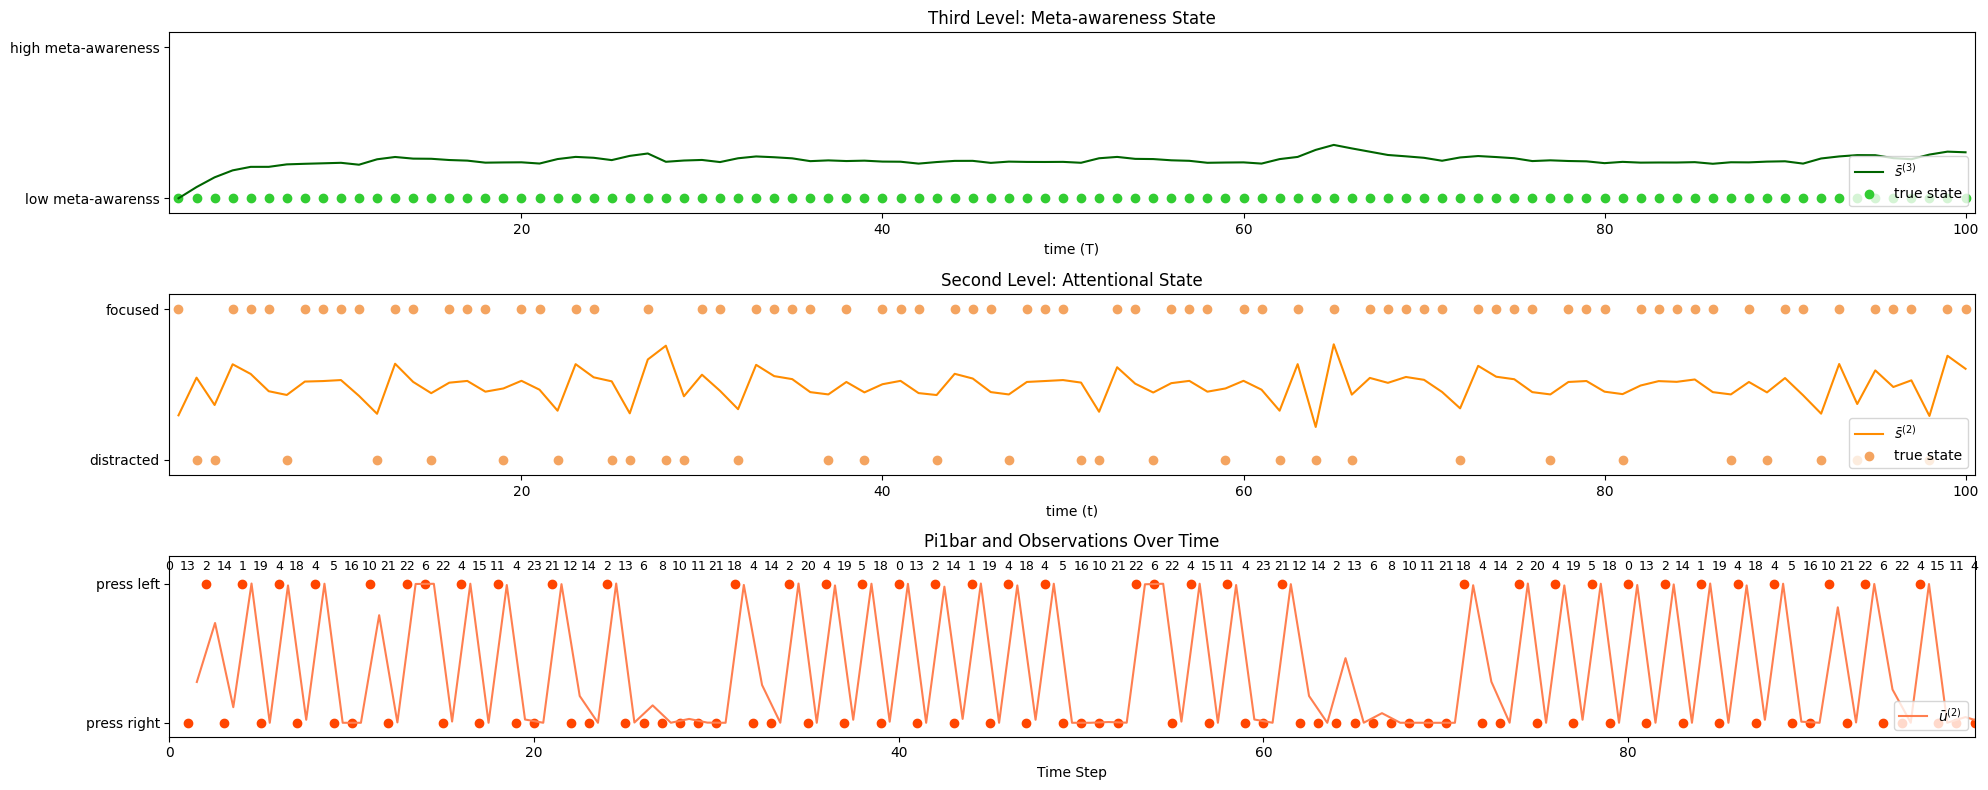

In [ ]:
################################################################################
### Low_metaawareness -> High_metaawarenss
################################################################################

################################################################################
### Defining parameters
################################################################################

fig7=0                      ### Setting parameters for each figure
fig10=0
fig11=1

T = 100             ### Number of time-steps

X1 = np.zeros((24,T))        ### perception prior
X1bar = np.zeros((24,T))     ### perception posterior
x1 = np.zeros(T)
x1[0] = 0

O_index = np.zeros(T)

O_index=[0,13,2,14,1,19,4,18,4,5,
         16,10,21,22,6,22,4,15,11,4,
         23,21,12,14,2,13,6,8,10,11,
         21,18,4,14,2,20,4,19,5,18,
         0,13,2,14,1,19,4,18,4,5,
         16,10,21,22,6,22,4,15,11,4,
         23,21,12,14,2,13,6,8,10,11,
         21,18,4,14,2,20,4,19,5,18,
         0,13,2,14,1,19,4,18,4,5,
         16,10,21,22,6,22,4,15,11,4
        ]

O1 = np.zeros((24,T))        ### observation prior (1,2,3,4)
O1bar = np.zeros((24,T))     ### observation posterior (1，2，3，4)

for t in range(T):
  O1bar[int(O_index[t]),t]=1



Pi1 = np.zeros((2, T))  # press yes/no
Pi1bar = np.zeros((2, T))  # press yes/no
E1 = np.array([2, 2])
C1 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

##############reward

X1_outcome = np.zeros((24,T))        ### perception prior
X1bar_outcome = np.zeros((24,T))     ### perception posterior

O1_outcome = np.zeros((2,T))        ### observation prior (1,2,3,4)
O1bar_outcome = np.zeros((2,T))     ### observation posterior (1，2，3，4)

C_routcome=[4,-6]
C_loutcome=[-6,4]

##############

gammaG1 = 2.0
u1 = np.zeros(T, dtype=int)

Pi2 = np.zeros((2,T))       ### prior attentional actions (stay, switch)
Pi2bar = np.zeros((2,T))    ### posterior attentional actions (stay, switch)

E2 = np.array([0.99,0.50])    ### prior over attentional policies
gammaG2 = 4.0
C2 = np.array([2,-2])       ### preference over attentional outcomes (agent is trying to perform the task - ie. maintain attention on the stimulous)

X3 = np.zeros((2,T))        ### meta-awareness states prior (high vs low precision)
X3bar = np.zeros((2,T))     ### meta-awareness states posterior (high vs low precision)
x3 = np.zeros(T)            ### discrete generative process states --> x3 sets gammaA2
x3[0] = 1                  ### start in a low meta-awareness state

X2 = np.zeros((2,T))        ### attentional states prior (high vs low precision)
X2bar = np.zeros((2,T))     ### attentional states posterior (high vs low precision)

x2 = np.zeros(T)            ### discrete generative process states --> x2 sets gammaA1
x2[0] = 0                   ### start in a focused state
u2 = np.zeros(T)            ### discrete generative process active states --> u2 sets transition probabilities for x2

O2bar = np.zeros((2,T))     ### observation posterior on the second level (focused vs distracted)


X3[:,0] = [0,1]           ### meta-awareness state prior D3
X2[:,0] = [0.5,0.5]         ### attentional state prior D2
X1[:,0] = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]         ### perceptual state prior D1
X1[:,1] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
######## Defining transition matrices  ##########

B1a = np.zeros((24,24))       ### press right
B1b = np.zeros((24,24))       ### press left

#right 0 left 1

#00000
B1a[:,0]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,0]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#10000
B1a[:,1]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,1]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#00001
B1a[:,2]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,2]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#10001
B1a[:,3]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,3]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#00010
B1a[:,4]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,4]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#01000
B1a[:,5]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,5]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#01010
B1a[:,6]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,6]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#11000
B1a[:,7]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,7]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#11010
B1a[:,8]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,8]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#00011
B1a[:,9]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,9]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#01011
B1a[:,10]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,10]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#11011
B1a[:,11]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,11]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#0  11111
B1a[:,12]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,12]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#1  01111
B1a[:,13]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,13]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#2  11110
B1a[:,14]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,14]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#3  01110
B1a[:,15]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,15]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]


#4  11101
B1a[:,16]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,16]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#5  10111
B1a[:,17]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,17]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#6  10101
B1a[:,18]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,18]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#7  00111
B1a[:,19]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,19]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#8  00101
B1a[:,20]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,20]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#9  11100
B1a[:,21]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,21]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#10  10100
B1a[:,22]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,22]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#11  00100
B1a[:,23]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,23]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

B3 = np.zeros((2,2))
B3[:,0]=[.9,0.1]            ###probability of high/low meta-awareness, given high meta-awareness
B3[:,1]=[0.1,.9]            ###probability of high/low meta-awareness, given low meta-awareness

B2a = np.zeros((2,2))       ### maintain attentional state - "stay"
B2b = np.zeros((2,2))       ### switch atttentional state - "switch"

B2a[:,0]=[.8,0.2]           ###probability of focus/distracted, given focus+stay
B2a[:,1]=[0.0,1.0]          ###probability of focus/distracted, given distracted+stay

B2b[:,0]=[0.0,1.0]          ###probability of focus/distracted, given focus+switch
B2b[:,1]=[1.0,0.0]          ###probability of focus/distracted, given distracted+switch

B2t = np.zeros((2,2,2))
B2t[:,:,0]=B2a
B2t[:,:,1]=B2b


######## Defining likelihood matrices  ##########
A1 = np.zeros((24,24))

#121
A1[:,0]=[0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267]
#131
A1[:,1]=[0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0]
#141
A1[:,2]=[0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0]
#231
A1[:,3]=[0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0]
#241
A1[:,4]=[0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0]
#321
A1[:,5]=[0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0]
#341
A1[:,6]=[0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0]
#421
A1[:,7]=[0,0,0,0,0,0.,0,0.7,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]
#431
A1[:,8]=[0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]

#132
A1[:,9]=[0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0]
#142
A1[:,10]=[0,0,0,0,0,0,0,0,0,0,0.7,0,0,0.267,0,0,0,0,0,0,0,0,0,0]
#212
A1[:,11]=[0,0,0,0,0,0,0,0,0,0,0,0.7,0.267,0,0,0,0,0,0,0,0,0,0,0]
#232
A1[:,12]=[0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0]
#242
A1[:,13]=[0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0]
#312
A1[:,14]=[0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0]
#342
A1[:,15]=[0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0]
#412
A1[:,16]=[0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0]
#432
A1[:,17]=[0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0]

#123
A1[:,18]=[0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0]
#143
A1[:,19]=[0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0]
#213
A1[:,20]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0]
#243
A1[:,21]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0]
#313
A1[:,22]=[0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0]
#323
A1[:,23]=[0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7]

A1[A1 == 0] = 0.001

gammaA1 = np.zeros(T)
betaA1m = np.zeros(2)
betaA1m = np.array([0.5,2.0])

A1_outcome_r = np.zeros((2,24))
A1_outcome_l = np.zeros((2,24))

A1_outcome_r[:,0]=[0.98,0.02]
A1_outcome_r[:,1]=[0.98,0.02]
A1_outcome_r[:,2]=[0.98,0.02]
A1_outcome_r[:,3]=[0.98,0.02]
A1_outcome_r[:,4]=[0.98,0.02]
A1_outcome_r[:,5]=[0.98,0.02]
A1_outcome_r[:,6]=[0.98,0.02]
A1_outcome_r[:,7]=[0.98,0.02]
A1_outcome_r[:,8]=[0.98,0.02]
A1_outcome_r[:,9]=[0.98,0.02]
A1_outcome_r[:,10]=[0.98,0.02]
A1_outcome_r[:,11]=[0.98,0.02]
A1_outcome_r[:,12]=[0.02,0.98]
A1_outcome_r[:,13]=[0.02,0.98]
A1_outcome_r[:,14]=[0.02,0.98]
A1_outcome_r[:,15]=[0.02,0.98]
A1_outcome_r[:,16]=[0.02,0.98]
A1_outcome_r[:,17]=[0.02,0.98]
A1_outcome_r[:,18]=[0.02,0.98]
A1_outcome_r[:,19]=[0.02,0.98]
A1_outcome_r[:,20]=[0.02,0.98]
A1_outcome_r[:,21]=[0.02,0.98]
A1_outcome_r[:,22]=[0.02,0.98]
A1_outcome_r[:,23]=[0.02,0.98]

A1_outcome_l[:,0]=[0.02,0.98]
A1_outcome_l[:,1]=[0.02,0.98]
A1_outcome_l[:,2]=[0.02,0.98]
A1_outcome_l[:,3]=[0.02,0.98]
A1_outcome_l[:,4]=[0.02,0.98]
A1_outcome_l[:,5]=[0.02,0.98]
A1_outcome_l[:,6]=[0.02,0.98]
A1_outcome_l[:,7]=[0.02,0.98]
A1_outcome_l[:,8]=[0.02,0.98]
A1_outcome_l[:,9]=[0.02,0.98]
A1_outcome_l[:,10]=[0.02,0.98]
A1_outcome_l[:,11]=[0.02,0.98]
A1_outcome_l[:,12]=[0.98,0.02]
A1_outcome_l[:,13]=[0.98,0.02]
A1_outcome_l[:,14]=[0.98,0.02]
A1_outcome_l[:,15]=[0.98,0.02]
A1_outcome_l[:,16]=[0.98,0.02]
A1_outcome_l[:,17]=[0.98,0.02]
A1_outcome_l[:,18]=[0.98,0.02]
A1_outcome_l[:,19]=[0.98,0.02]
A1_outcome_l[:,20]=[0.98,0.02]
A1_outcome_l[:,21]=[0.98,0.02]
A1_outcome_l[:,22]=[0.98,0.02]
A1_outcome_l[:,23]=[0.98,0.02]


A2 = np.zeros((2,2))
A2[:,0] = [0.65,0.35]
A2[:,1] = [0.35,0.65]
gammaA2 = np.zeros(T)
betaA2m = np.array([0.5,2.0])

A3 = np.zeros((2,2))
A3[:,0] = [0.9,0.1]
A3[:,1] = [0.1,0.9]

######## Setting up F & G calculations #######
H1 = np.zeros(24)

H1[0] = np.inner(A1,np.log(A1))[0,0]
H1[1] = np.inner(A1,np.log(A1))[1,1]
H1[2] = np.inner(A1,np.log(A1))[2,2]
H1[3] = np.inner(A1,np.log(A1))[3,3]
H1[4] = np.inner(A1,np.log(A1))[4,4]
H1[5] = np.inner(A1,np.log(A1))[5,5]
H1[6] = np.inner(A1,np.log(A1))[6,6]
H1[7] = np.inner(A1,np.log(A1))[7,7]
H1[8] = np.inner(A1,np.log(A1))[8,8]
H1[9] = np.inner(A1,np.log(A1))[9,9]

H1[10] = np.inner(A1,np.log(A1))[10,10]
H1[11] = np.inner(A1,np.log(A1))[11,11]
H1[12] = np.inner(A1,np.log(A1))[12,12]
H1[13] = np.inner(A1,np.log(A1))[13,13]
H1[14] = np.inner(A1,np.log(A1))[14,14]
H1[15] = np.inner(A1,np.log(A1))[15,15]
H1[16] = np.inner(A1,np.log(A1))[16,16]
H1[17] = np.inner(A1,np.log(A1))[17,18]
H1[18] = np.inner(A1,np.log(A1))[19,19]
H1[19] = np.inner(A1,np.log(A1))[20,20]

H1[20] = np.inner(A1,np.log(A1))[20,20]
H1[21] = np.inner(A1,np.log(A1))[21,21]
H1[22] = np.inner(A1,np.log(A1))[22,22]
H1[23] = np.inner(A1,np.log(A1))[23,23]

H1_r = np.zeros(2)


H1_p = np.zeros(2)

G1 = np.zeros((2,T))
F1 = np.zeros((2,T))

H2 = np.zeros(2)
H2[0] = np.inner(A2,np.log(A2))[0,0]
H2[1] = np.inner(A2,np.log(A2))[1,1]

G2 = np.zeros((2,T))
F2 = np.zeros((2,T))

################################################################################
### Running the simulation
################################################################################


### State belief updating
for t in range(T):
  ###meta-awareness level X3:
  betaA2 = np.sum(betaA2m*np.inner(A3,X3[:,t])) ### Bayesian model average (prior precision beliefs)
  gammaA2[t] = betaA2m[int(x3[t])]**-1          ### actual precision is based on generative process (earlier it was betaA2**-1)
  A2bar = softmax_dim2(np.log(A2)*gammaA2[t])
  O2bar[int(x2[t]),t]=1 ###set the true lower-level attentional states as observations to inform the meta-awareness charge

  ###attentional level X2:
  betaA1 = np.sum(betaA1m*np.inner(A2bar,X2[:,t]))  ### Bayesian model average (prior precision beliefs)
  gammaA1[t] = betaA1m[int(x2[t])]**-1              ### actual precision is based on generative process (earlier it was betaA1**-1)
  A1bar = softmax_dim2(np.log(A1)*gammaA1[t])              ### Precision weighted likelihood mapping

  ###perceptual level X1:
  O1[:,t] = np.inner(A1bar,X1[:,t])                                        ### Observation priors
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior


  ###calculating ascending message from X1->X2
  AtC = 0                                       ### "attentional charge" - inverse precision updating term
  for i in range(24):                            ##loop over outcomes
    for j in range(24):                          ##loop over states
      AtC += (O1bar[i,t]-A1bar[i,j])*X1bar[j,t]*np.log(A1[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if AtC > betaA1m[0]:
    AtC = betaA1m[0]-10**-5
  betaA1bar = betaA1 - AtC                      ## inverse precision posterior
  X2bar[:,t] = softmax(np.log(X2[:,t])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))  ## calculate attentional state posterior given precision belief
  X2bar[:,t] = softmax(np.log(X2[:,t])+gammaA2[t]*np.log(A2[int(x2[t]),:])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))


  ###calculating ascending message from X2->X3
  MaC = 0                                       ### "meta-awareness charge" - inverse precision updating term
  for i in range(2):                            ##loop over outcomes
    for j in range(2):                          ##loop over states
      MaC += (O2bar[i,t]-A2bar[i,j])*X2bar[j,t]*np.log(A2[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if MaC > betaA2m[0]:
    MaC = betaA2m[0]-10**-5
  betaA2bar = betaA2 - MaC                      ## inverse precision posterior
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs

### Policy selection

  if t<(T-1):

    X1a = np.inner(B1a,X1bar[:,t])
    O1a = np.inner(A1bar,X1a)
    O1a_outcome_r = np.inner(A1_outcome_r,X1a)

    X1b = np.inner(B1b,X1bar[:,t])
    O1b = np.inner(A1bar,X1b)
    O1a_outcome_l = np.inner(A1_outcome_l,X1b)

    if O_index[t] < 12:
      G1[0,t] = np.sum((O1a*(np.log(O1a)-C1)-X1a*H1))+np.sum(O1a_outcome_r*(np.log(O1a_outcome_r)-C_routcome))
      G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_r)-C_loutcome))
    else:
      G1[0,t] = np.sum(O1a*(np.log(O1a)-C1)-X1a*H1)+np.sum(O1a_outcome_r*(np.log(O1a_outcome_l)-C_routcome))
      G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_l)-C_loutcome))

    Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])

    B1 = B1a*Pi1[0,t]+B1b*Pi1[1,t]


    u1[t] = np.arange(2)[np.argmax(Pi1[:, t])]


    X2a = np.inner(B2a,X2bar[:,t])
    O2a = np.inner(A2,X2a)

    X2b = np.inner(B2b,X2bar[:,t])
    O2b = np.inner(A2,X2b)

    G2[0,t] = np.sum(O2a*(np.log(O2a)-C2)-X2a*H2)
    G2[1,t] = np.sum(O2b*(np.log(O2b)-C2)-X2b*H2)

    Pi2[:,t] = softmax(np.log(E2)-gammaG2*G2[:,t])
    #print("Pi2:",Pi2[:,t],"G2:",G2[:,t])


    B2 = B2a*Pi2[0,t]+B2b*Pi2[1,t]

    X3[:,t+1] = np.inner(B3,X3bar[:,t])
    X2[:,t+1] = np.inner(B2,X2bar[:,t]) ###evolve expected state
    X1[:,t+1] = np.inner(B1,X1bar[:,t])

    u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


     ### generative process driving attentional states

    if u1[t] == 0:
      x1[t + 1] = np.random.choice(np.arange(24), p=B1a[:,int(x1[t])])
    else:
      x1[t + 1] = np.random.choice(np.arange(24), p=B1b[:,int(x1[t])])

    if u2[t]==0:
      x2[t+1] = np.random.choice([0,1],p=B2a[:,int(x2[t])]) ###generate true state from action 0
    else:
      x2[t+1] = np.random.choice([0,1],p=B2b[:,int(x2[t])]) ###generate true state from action 1

    if fig11:
      if t<T/2:
        x3[t+1]=1
      else:
        x3[t+1]=1
    else:
      x3[t+1] = np.random.choice([0,1],p=B3[:,int(x3[t])]) ###generate true state

  X1abar=softmax(np.log(X1a)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))
  X1bbar=softmax(np.log(X1b)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))

  X2abar = softmax(np.log(X2a)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))
  X2bbar = softmax(np.log(X2b)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))

  if t>0:

    F1[0,t-1] = np.sum(X1abar*(np.log(X1abar)-np.log(A1[int(x1[t]),:])-np.log(X1a)))
    F1[1,t-1] = np.sum(X1bbar*(np.log(X1bbar)-np.log(A1[int(x1[t]),:])-np.log(X1b)))

    F2[0,t-1] = np.sum(X2abar*(np.log(X2abar)-np.log(A2[int(x2[t]),:])-np.log(X2a)))
    F2[1,t-1] = np.sum(X2bbar*(np.log(X2bbar)-np.log(A2[int(x2[t]),:])-np.log(X2b)))

    #print("F2:",F2[:,t-1])
    Pi1bar[:,t-1]=softmax(np.log(E1)-gammaG1*G1[:,t-1]-F1[:,t-1])
    Pi2bar[:,t-1]=softmax(np.log(E2)-gammaG2*G2[:,t-1]-F2[:,t-1])

################################################################################
### Plotting results
################################################################################

plt.figure(figsize=(20,8))

plt.subplot(3,1,1)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X3bar[0,:],label=r'${\bar{s}}^{(3)}$',color='darkgreen')
plt.scatter(1+np.arange(T),1-x3,label='true state',color='limegreen')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['low meta-awarenss','high meta-awareness'])
plt.xlabel('time (T)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Third Level: Meta-awareness State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

#plt.subplot(4,1,2)
#plt.plot(1.5+np.arange(0,T-1),Pi2[0,:-1],label='stay (prior)',linestyle='--')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (prior')
#plt.plot(1.5+np.arange(0,T-1),Pi2bar[0,:-1],label=r'${\bar{\pi}}^{(2)}$',color='coral')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (posterior)',linestyle='--')
#plt.scatter(1+np.arange(T),1-u2,label='true action',color='orangered')
#plt.legend(loc = 'lower right')
#plt.ylim([0,1.0])
#plt.yticks([0,1],['switch','stay'])
#plt.ylabel(r'$\pi^{(2)}$')
#plt.title('Second Level: Attentional Action')
#plt.xlim([0.5,T+0.5])
#plt.xlabel('time (t)')

plt.subplot(3,1,2)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X2bar[0,:],label=r'${\bar{s}}^{(2)}$',color='darkorange')
plt.scatter(1+np.arange(T),1-x2,label='true state',color='sandybrown')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['distracted','focused'])
plt.xlabel('time (t)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Second Level: Attentional State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

plt.subplot(3,1,3)
plt.plot(1.5 + np.arange(0, T-1), Pi1[0, :-1], label=r'${\bar{u}}^{(2)}$', color='coral')
for i in range(T):
    plt.text(i, 1.1, f"{int(O_index[i])}", fontsize=9, ha='center')
plt.legend(loc='lower right')
plt.scatter(1+np.arange(T),1-u1,label='true action',color='orangered')
plt.ylim([-0.1, 1.2])
plt.yticks(np.linspace(0, 1, 11))
plt.title('Pi1bar and Observations Over Time')
plt.xlabel('Time Step')
plt.yticks([0,1],['press right','press left'])
plt.xlim([0, T - 1])


plt.tight_layout()
plt.savefig("figure_11.tiff", dpi = 600)
#plt.savefig("figure_11.tiff", dpi = 600)
# files.download("figure_11.tiff")

<ipython-input-17-9550ff5ea7a1>:400: RuntimeWarning: divide by zero encountered in log
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior
<ipython-input-17-9550ff5ea7a1>:423: RuntimeWarning: divide by zero encountered in log
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs
<ipython-input-17-9550ff5ea7a1>:471: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


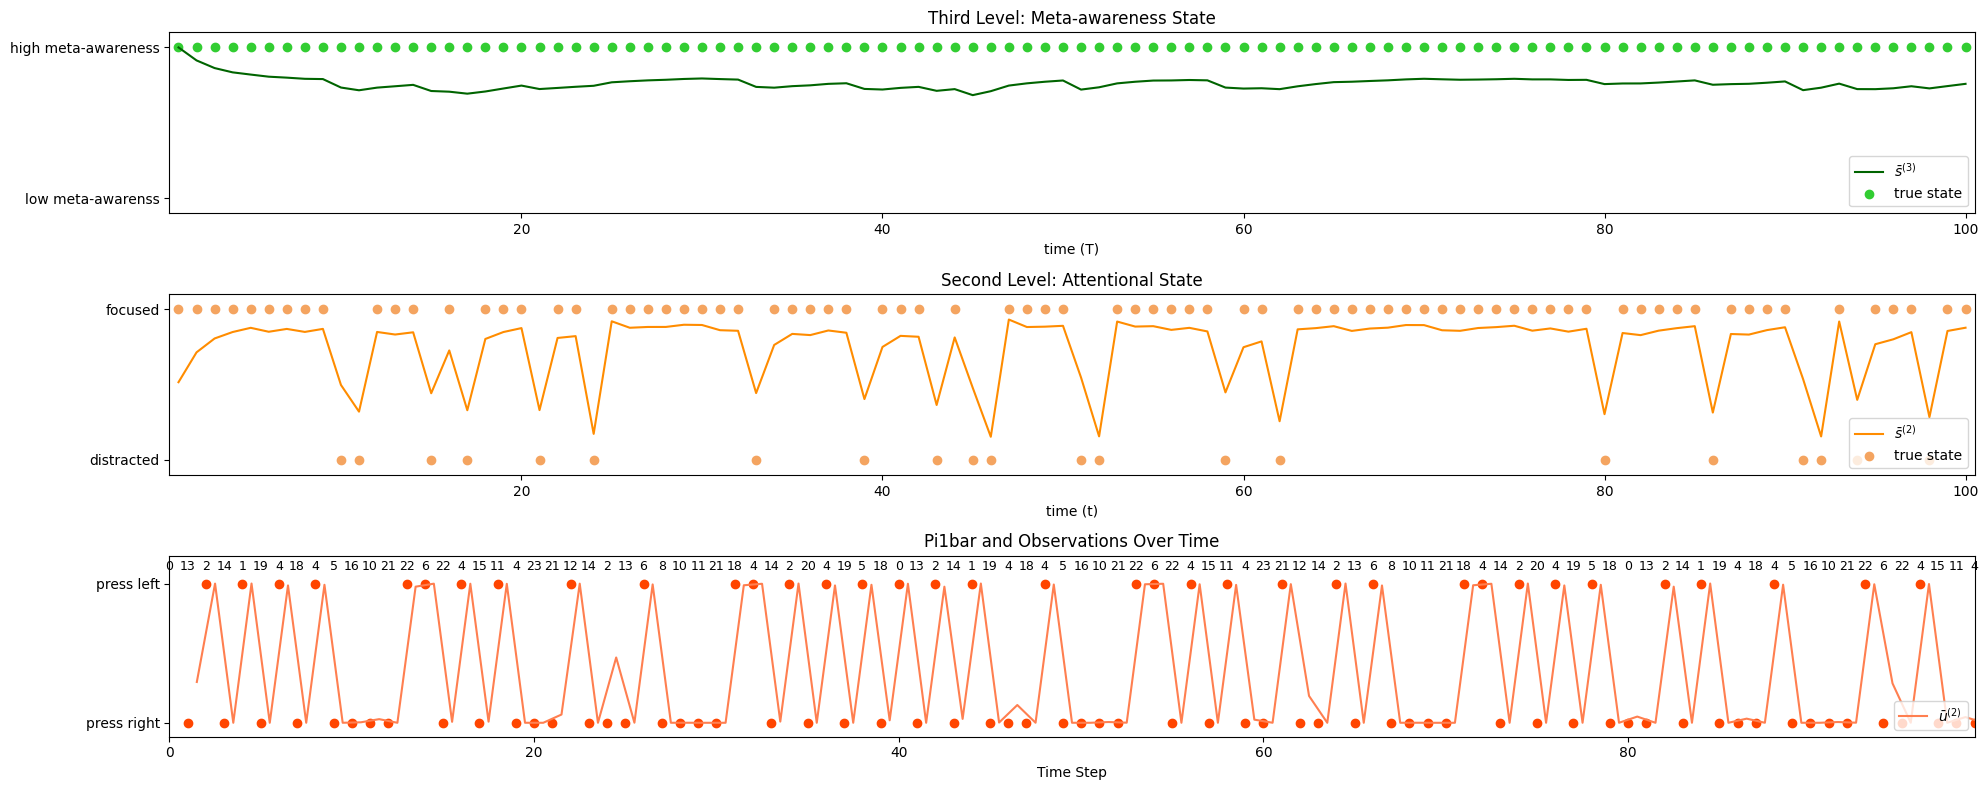

In [ ]:
################################################################################
### Low_metaawareness -> High_metaawarenss
################################################################################

################################################################################
### Defining parameters
################################################################################

fig7=0                      ### Setting parameters for each figure
fig10=0
fig11=1

T = 100             ### Number of time-steps

X1 = np.zeros((24,T))        ### perception prior
X1bar = np.zeros((24,T))     ### perception posterior
x1 = np.zeros(T)
x1[0] = 0

O_index = np.zeros(T)

O_index=[0,13,2,14,1,19,4,18,4,5,
         16,10,21,22,6,22,4,15,11,4,
         23,21,12,14,2,13,6,8,10,11,
         21,18,4,14,2,20,4,19,5,18,
         0,13,2,14,1,19,4,18,4,5,
         16,10,21,22,6,22,4,15,11,4,
         23,21,12,14,2,13,6,8,10,11,
         21,18,4,14,2,20,4,19,5,18,
         0,13,2,14,1,19,4,18,4,5,
         16,10,21,22,6,22,4,15,11,4
        ]

O1 = np.zeros((24,T))        ### observation prior (1,2,3,4)
O1bar = np.zeros((24,T))     ### observation posterior (1，2，3，4)

for t in range(T):
  O1bar[int(O_index[t]),t]=1



Pi1 = np.zeros((2, T))  # press yes/no
Pi1bar = np.zeros((2, T))  # press yes/no
E1 = np.array([2, 2])
C1 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

##############reward

X1_outcome = np.zeros((24,T))        ### perception prior
X1bar_outcome = np.zeros((24,T))     ### perception posterior

O1_outcome = np.zeros((2,T))        ### observation prior (1,2,3,4)
O1bar_outcome = np.zeros((2,T))     ### observation posterior (1，2，3，4)

C_routcome=[4,-6]
C_loutcome=[-6,4]

##############

gammaG1 = 2.0
u1 = np.zeros(T, dtype=int)

Pi2 = np.zeros((2,T))       ### prior attentional actions (stay, switch)
Pi2bar = np.zeros((2,T))    ### posterior attentional actions (stay, switch)

E2 = np.array([0.99,0.50])    ### prior over attentional policies
gammaG2 = 4.0
C2 = np.array([2,-2])       ### preference over attentional outcomes (agent is trying to perform the task - ie. maintain attention on the stimulous)

X3 = np.zeros((2,T))        ### meta-awareness states prior (high vs low precision)
X3bar = np.zeros((2,T))     ### meta-awareness states posterior (high vs low precision)
x3 = np.zeros(T)            ### discrete generative process states --> x3 sets gammaA2
x3[0] = 0                  ### start in a low meta-awareness state

X2 = np.zeros((2,T))        ### attentional states prior (high vs low precision)
X2bar = np.zeros((2,T))     ### attentional states posterior (high vs low precision)

x2 = np.zeros(T)            ### discrete generative process states --> x2 sets gammaA1
x2[0] = 0                   ### start in a focused state
u2 = np.zeros(T)            ### discrete generative process active states --> u2 sets transition probabilities for x2

O2bar = np.zeros((2,T))     ### observation posterior on the second level (focused vs distracted)


X3[:,0] = [1,0]           ### meta-awareness state prior D3
X2[:,0] = [0.5,0.5]         ### attentional state prior D2
X1[:,0] = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]         ### perceptual state prior D1
X1[:,1] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
######## Defining transition matrices  ##########

B1a = np.zeros((24,24))       ### press right
B1b = np.zeros((24,24))       ### press left

#right 0 left 1

#00000
B1a[:,0]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,0]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#10000
B1a[:,1]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,1]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#00001
B1a[:,2]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,2]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#10001
B1a[:,3]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,3]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#00010
B1a[:,4]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,4]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#01000
B1a[:,5]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,5]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#01010
B1a[:,6]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,6]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#11000
B1a[:,7]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,7]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#11010
B1a[:,8]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,8]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#00011
B1a[:,9]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,9]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#01011
B1a[:,10]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,10]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#11011
B1a[:,11]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,11]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#0  11111
B1a[:,12]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
B1b[:,12]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

#1  01111
B1a[:,13]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,13]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#2  11110
B1a[:,14]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,14]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#3  01110
B1a[:,15]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,15]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]


#4  11101
B1a[:,16]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,16]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#5  10111
B1a[:,17]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,17]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#6  10101
B1a[:,18]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,18]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#7  00111
B1a[:,19]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,19]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#8  00101
B1a[:,20]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,20]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#9  11100
B1a[:,21]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,21]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#10  10100
B1a[:,22]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,22]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

#11  00100
B1a[:,23]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
B1b[:,23]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

B3 = np.zeros((2,2))
B3[:,0]=[.9,0.1]            ###probability of high/low meta-awareness, given high meta-awareness
B3[:,1]=[0.1,.9]            ###probability of high/low meta-awareness, given low meta-awareness

B2a = np.zeros((2,2))       ### maintain attentional state - "stay"
B2b = np.zeros((2,2))       ### switch atttentional state - "switch"

B2a[:,0]=[.8,0.2]           ###probability of focus/distracted, given focus+stay
B2a[:,1]=[0.0,1.0]          ###probability of focus/distracted, given distracted+stay

B2b[:,0]=[0.0,1.0]          ###probability of focus/distracted, given focus+switch
B2b[:,1]=[1.0,0.0]          ###probability of focus/distracted, given distracted+switch

B2t = np.zeros((2,2,2))
B2t[:,:,0]=B2a
B2t[:,:,1]=B2b


######## Defining likelihood matrices  ##########
A1 = np.zeros((24,24))

#121
A1[:,0]=[0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267]
#131
A1[:,1]=[0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0]
#141
A1[:,2]=[0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0]
#231
A1[:,3]=[0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0]
#241
A1[:,4]=[0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0]
#321
A1[:,5]=[0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0]
#341
A1[:,6]=[0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0]
#421
A1[:,7]=[0,0,0,0,0,0.,0,0.7,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]
#431
A1[:,8]=[0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]

#132
A1[:,9]=[0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0]
#142
A1[:,10]=[0,0,0,0,0,0,0,0,0,0,0.7,0,0,0.267,0,0,0,0,0,0,0,0,0,0]
#212
A1[:,11]=[0,0,0,0,0,0,0,0,0,0,0,0.7,0.267,0,0,0,0,0,0,0,0,0,0,0]
#232
A1[:,12]=[0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0]
#242
A1[:,13]=[0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0]
#312
A1[:,14]=[0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0]
#342
A1[:,15]=[0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0]
#412
A1[:,16]=[0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0]
#432
A1[:,17]=[0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0]

#123
A1[:,18]=[0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0]
#143
A1[:,19]=[0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0]
#213
A1[:,20]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0]
#243
A1[:,21]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0]
#313
A1[:,22]=[0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0]
#323
A1[:,23]=[0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7]

A1[A1 == 0] = 0.001

gammaA1 = np.zeros(T)
betaA1m = np.zeros(2)
betaA1m = np.array([0.5,2.0])

A1_outcome_r = np.zeros((2,24))
A1_outcome_l = np.zeros((2,24))

A1_outcome_r[:,0]=[0.98,0.02]
A1_outcome_r[:,1]=[0.98,0.02]
A1_outcome_r[:,2]=[0.98,0.02]
A1_outcome_r[:,3]=[0.98,0.02]
A1_outcome_r[:,4]=[0.98,0.02]
A1_outcome_r[:,5]=[0.98,0.02]
A1_outcome_r[:,6]=[0.98,0.02]
A1_outcome_r[:,7]=[0.98,0.02]
A1_outcome_r[:,8]=[0.98,0.02]
A1_outcome_r[:,9]=[0.98,0.02]
A1_outcome_r[:,10]=[0.98,0.02]
A1_outcome_r[:,11]=[0.98,0.02]
A1_outcome_r[:,12]=[0.02,0.98]
A1_outcome_r[:,13]=[0.02,0.98]
A1_outcome_r[:,14]=[0.02,0.98]
A1_outcome_r[:,15]=[0.02,0.98]
A1_outcome_r[:,16]=[0.02,0.98]
A1_outcome_r[:,17]=[0.02,0.98]
A1_outcome_r[:,18]=[0.02,0.98]
A1_outcome_r[:,19]=[0.02,0.98]
A1_outcome_r[:,20]=[0.02,0.98]
A1_outcome_r[:,21]=[0.02,0.98]
A1_outcome_r[:,22]=[0.02,0.98]
A1_outcome_r[:,23]=[0.02,0.98]

A1_outcome_l[:,0]=[0.02,0.98]
A1_outcome_l[:,1]=[0.02,0.98]
A1_outcome_l[:,2]=[0.02,0.98]
A1_outcome_l[:,3]=[0.02,0.98]
A1_outcome_l[:,4]=[0.02,0.98]
A1_outcome_l[:,5]=[0.02,0.98]
A1_outcome_l[:,6]=[0.02,0.98]
A1_outcome_l[:,7]=[0.02,0.98]
A1_outcome_l[:,8]=[0.02,0.98]
A1_outcome_l[:,9]=[0.02,0.98]
A1_outcome_l[:,10]=[0.02,0.98]
A1_outcome_l[:,11]=[0.02,0.98]
A1_outcome_l[:,12]=[0.98,0.02]
A1_outcome_l[:,13]=[0.98,0.02]
A1_outcome_l[:,14]=[0.98,0.02]
A1_outcome_l[:,15]=[0.98,0.02]
A1_outcome_l[:,16]=[0.98,0.02]
A1_outcome_l[:,17]=[0.98,0.02]
A1_outcome_l[:,18]=[0.98,0.02]
A1_outcome_l[:,19]=[0.98,0.02]
A1_outcome_l[:,20]=[0.98,0.02]
A1_outcome_l[:,21]=[0.98,0.02]
A1_outcome_l[:,22]=[0.98,0.02]
A1_outcome_l[:,23]=[0.98,0.02]


A2 = np.zeros((2,2))
A2[:,0] = [0.65,0.35]
A2[:,1] = [0.35,0.65]
gammaA2 = np.zeros(T)
betaA2m = np.array([0.5,2.0])

A3 = np.zeros((2,2))
A3[:,0] = [0.9,0.1]
A3[:,1] = [0.1,0.9]

######## Setting up F & G calculations #######
H1 = np.zeros(24)

H1[0] = np.inner(A1,np.log(A1))[0,0]
H1[1] = np.inner(A1,np.log(A1))[1,1]
H1[2] = np.inner(A1,np.log(A1))[2,2]
H1[3] = np.inner(A1,np.log(A1))[3,3]
H1[4] = np.inner(A1,np.log(A1))[4,4]
H1[5] = np.inner(A1,np.log(A1))[5,5]
H1[6] = np.inner(A1,np.log(A1))[6,6]
H1[7] = np.inner(A1,np.log(A1))[7,7]
H1[8] = np.inner(A1,np.log(A1))[8,8]
H1[9] = np.inner(A1,np.log(A1))[9,9]

H1[10] = np.inner(A1,np.log(A1))[10,10]
H1[11] = np.inner(A1,np.log(A1))[11,11]
H1[12] = np.inner(A1,np.log(A1))[12,12]
H1[13] = np.inner(A1,np.log(A1))[13,13]
H1[14] = np.inner(A1,np.log(A1))[14,14]
H1[15] = np.inner(A1,np.log(A1))[15,15]
H1[16] = np.inner(A1,np.log(A1))[16,16]
H1[17] = np.inner(A1,np.log(A1))[17,18]
H1[18] = np.inner(A1,np.log(A1))[19,19]
H1[19] = np.inner(A1,np.log(A1))[20,20]

H1[20] = np.inner(A1,np.log(A1))[20,20]
H1[21] = np.inner(A1,np.log(A1))[21,21]
H1[22] = np.inner(A1,np.log(A1))[22,22]
H1[23] = np.inner(A1,np.log(A1))[23,23]

H1_r = np.zeros(2)


H1_p = np.zeros(2)

G1 = np.zeros((2,T))
F1 = np.zeros((2,T))

H2 = np.zeros(2)
H2[0] = np.inner(A2,np.log(A2))[0,0]
H2[1] = np.inner(A2,np.log(A2))[1,1]

G2 = np.zeros((2,T))
F2 = np.zeros((2,T))

################################################################################
### Running the simulation
################################################################################


### State belief updating
for t in range(T):
  ###meta-awareness level X3:
  betaA2 = np.sum(betaA2m*np.inner(A3,X3[:,t])) ### Bayesian model average (prior precision beliefs)
  gammaA2[t] = betaA2m[int(x3[t])]**-1          ### actual precision is based on generative process (earlier it was betaA2**-1)
  A2bar = softmax_dim2(np.log(A2)*gammaA2[t])
  O2bar[int(x2[t]),t]=1 ###set the true lower-level attentional states as observations to inform the meta-awareness charge

  ###attentional level X2:
  betaA1 = np.sum(betaA1m*np.inner(A2bar,X2[:,t]))  ### Bayesian model average (prior precision beliefs)
  gammaA1[t] = betaA1m[int(x2[t])]**-1              ### actual precision is based on generative process (earlier it was betaA1**-1)
  A1bar = softmax_dim2(np.log(A1)*gammaA1[t])              ### Precision weighted likelihood mapping

  ###perceptual level X1:
  O1[:,t] = np.inner(A1bar,X1[:,t])                                        ### Observation priors
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior


  ###calculating ascending message from X1->X2
  AtC = 0                                       ### "attentional charge" - inverse precision updating term
  for i in range(24):                            ##loop over outcomes
    for j in range(24):                          ##loop over states
      AtC += (O1bar[i,t]-A1bar[i,j])*X1bar[j,t]*np.log(A1[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if AtC > betaA1m[0]:
    AtC = betaA1m[0]-10**-5
  betaA1bar = betaA1 - AtC                      ## inverse precision posterior
  X2bar[:,t] = softmax(np.log(X2[:,t])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))  ## calculate attentional state posterior given precision belief
  X2bar[:,t] = softmax(np.log(X2[:,t])+gammaA2[t]*np.log(A2[int(x2[t]),:])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))


  ###calculating ascending message from X2->X3
  MaC = 0                                       ### "meta-awareness charge" - inverse precision updating term
  for i in range(2):                            ##loop over outcomes
    for j in range(2):                          ##loop over states
      MaC += (O2bar[i,t]-A2bar[i,j])*X2bar[j,t]*np.log(A2[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if MaC > betaA2m[0]:
    MaC = betaA2m[0]-10**-5
  betaA2bar = betaA2 - MaC                      ## inverse precision posterior
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs

### Policy selection

  if t<(T-1):

    X1a = np.inner(B1a,X1bar[:,t])
    O1a = np.inner(A1bar,X1a)
    O1a_outcome_r = np.inner(A1_outcome_r,X1a)

    X1b = np.inner(B1b,X1bar[:,t])
    O1b = np.inner(A1bar,X1b)
    O1a_outcome_l = np.inner(A1_outcome_l,X1b)

    if O_index[t] < 12:
      G1[0,t] = np.sum((O1a*(np.log(O1a)-C1)-X1a*H1))+np.sum(O1a_outcome_r*(np.log(O1a_outcome_r)-C_routcome))
      G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_r)-C_loutcome))
    else:
      G1[0,t] = np.sum(O1a*(np.log(O1a)-C1)-X1a*H1)+np.sum(O1a_outcome_r*(np.log(O1a_outcome_l)-C_routcome))
      G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_l)-C_loutcome))

    Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])

    B1 = B1a*Pi1[0,t]+B1b*Pi1[1,t]


    u1[t] = np.arange(2)[np.argmax(Pi1[:, t])]


    X2a = np.inner(B2a,X2bar[:,t])
    O2a = np.inner(A2,X2a)

    X2b = np.inner(B2b,X2bar[:,t])
    O2b = np.inner(A2,X2b)

    G2[0,t] = np.sum(O2a*(np.log(O2a)-C2)-X2a*H2)
    G2[1,t] = np.sum(O2b*(np.log(O2b)-C2)-X2b*H2)

    Pi2[:,t] = softmax(np.log(E2)-gammaG2*G2[:,t])
    #print("Pi2:",Pi2[:,t],"G2:",G2[:,t])


    B2 = B2a*Pi2[0,t]+B2b*Pi2[1,t]

    X3[:,t+1] = np.inner(B3,X3bar[:,t])
    X2[:,t+1] = np.inner(B2,X2bar[:,t]) ###evolve expected state
    X1[:,t+1] = np.inner(B1,X1bar[:,t])

    u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


     ### generative process driving attentional states

    if u1[t] == 0:
      x1[t + 1] = np.random.choice(np.arange(24), p=B1a[:,int(x1[t])])
    else:
      x1[t + 1] = np.random.choice(np.arange(24), p=B1b[:,int(x1[t])])

    if u2[t]==0:
      x2[t+1] = np.random.choice([0,1],p=B2a[:,int(x2[t])]) ###generate true state from action 0
    else:
      x2[t+1] = np.random.choice([0,1],p=B2b[:,int(x2[t])]) ###generate true state from action 1

    if fig11:
      if t<T/2:
        x3[t+1]=0
      else:
        x3[t+1]=0
    else:
      x3[t+1] = np.random.choice([0,1],p=B3[:,int(x3[t])]) ###generate true state

  X1abar=softmax(np.log(X1a)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))
  X1bbar=softmax(np.log(X1b)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))

  X2abar = softmax(np.log(X2a)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))
  X2bbar = softmax(np.log(X2b)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))

  if t>0:

    F1[0,t-1] = np.sum(X1abar*(np.log(X1abar)-np.log(A1[int(x1[t]),:])-np.log(X1a)))
    F1[1,t-1] = np.sum(X1bbar*(np.log(X1bbar)-np.log(A1[int(x1[t]),:])-np.log(X1b)))

    F2[0,t-1] = np.sum(X2abar*(np.log(X2abar)-np.log(A2[int(x2[t]),:])-np.log(X2a)))
    F2[1,t-1] = np.sum(X2bbar*(np.log(X2bbar)-np.log(A2[int(x2[t]),:])-np.log(X2b)))

    #print("F2:",F2[:,t-1])
    Pi1bar[:,t-1]=softmax(np.log(E1)-gammaG1*G1[:,t-1]-F1[:,t-1])
    Pi2bar[:,t-1]=softmax(np.log(E2)-gammaG2*G2[:,t-1]-F2[:,t-1])

################################################################################
### Plotting results
################################################################################

plt.figure(figsize=(20,8))

plt.subplot(3,1,1)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X3bar[0,:],label=r'${\bar{s}}^{(3)}$',color='darkgreen')
plt.scatter(1+np.arange(T),1-x3,label='true state',color='limegreen')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['low meta-awarenss','high meta-awareness'])
plt.xlabel('time (T)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Third Level: Meta-awareness State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

#plt.subplot(4,1,2)
#plt.plot(1.5+np.arange(0,T-1),Pi2[0,:-1],label='stay (prior)',linestyle='--')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (prior')
#plt.plot(1.5+np.arange(0,T-1),Pi2bar[0,:-1],label=r'${\bar{\pi}}^{(2)}$',color='coral')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (posterior)',linestyle='--')
#plt.scatter(1+np.arange(T),1-u2,label='true action',color='orangered')
#plt.legend(loc = 'lower right')
#plt.ylim([0,1.0])
#plt.yticks([0,1],['switch','stay'])
#plt.ylabel(r'$\pi^{(2)}$')
#plt.title('Second Level: Attentional Action')
#plt.xlim([0.5,T+0.5])
#plt.xlabel('time (t)')

plt.subplot(3,1,2)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X2bar[0,:],label=r'${\bar{s}}^{(2)}$',color='darkorange')
plt.scatter(1+np.arange(T),1-x2,label='true state',color='sandybrown')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['distracted','focused'])
plt.xlabel('time (t)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Second Level: Attentional State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

plt.subplot(3,1,3)
plt.plot(1.5 + np.arange(0, T-1), Pi1[0, :-1], label=r'${\bar{u}}^{(2)}$', color='coral')
for i in range(T):
    plt.text(i, 1.1, f"{int(O_index[i])}", fontsize=9, ha='center')
plt.legend(loc='lower right')
plt.scatter(1+np.arange(T),1-u1,label='true action',color='orangered')
plt.ylim([-0.1, 1.2])
plt.yticks(np.linspace(0, 1, 11))
plt.title('Pi1bar and Observations Over Time')
plt.xlabel('Time Step')
plt.yticks([0,1],['press right','press left'])
plt.xlim([0, T - 1])


plt.tight_layout()
plt.savefig("figure_11.tiff", dpi = 600)
#plt.savefig("figure_11.tiff", dpi = 600)
# files.download("figure_11.tiff")

In [ ]:
def run_simulation(T):

  fig7=0                      ### Setting parameters for each figure
  fig10=0
  fig11=1

  T = 100             ### Number of time-steps

  X1 = np.zeros((24,T))        ### perception prior
  X1bar = np.zeros((24,T))     ### perception posterior
  x1 = np.zeros(T)
  x1[0] = 0

  O_index = np.zeros(T)

  O_index=[0,13,2,14,1,19,4,18,4,5,
          16,10,21,22,6,22,4,15,11,4,
          23,21,12,14,2,13,6,8,10,11,
          21,18,4,14,2,20,4,19,5,18,
          0,13,2,14,1,19,4,18,4,5,
          16,10,21,22,6,22,4,15,11,4,
          23,21,12,14,2,13,6,8,10,11,
          21,18,4,14,2,20,4,19,5,18,
          0,13,2,14,1,19,4,18,4,5,
          16,10,21,22,6,22,4,15,11,4
          ]
  answer = [0,1,0,1,0,1,0,1,0,0,
            1,0,1,1,0,1,0,1,0,1,
            1,1,0,1,0,1,0,0,0,0,
            1,1,0,1,0,1,0,1,0,1,
            0,1,0,1,0,1,0,1,0,0,
            1,0,1,1,0,1,0,1,0,0,
            1,0,1,1,0,1,0,1,0,1,
            1,1,0,1,0,1,0,0,0,0,
            1,1,0,1,0,1,0,1,0,1,
            0,1,0,1,0,1,0,1,0,0
            ]

  O1 = np.zeros((24,T))        ### observation prior (1,2,3,4)
  O1bar = np.zeros((24,T))     ### observation posterior (1，2，3，4)

  for t in range(T):
    O1bar[int(O_index[t]),t]=1



  Pi1 = np.zeros((2, T))  # press yes/no
  Pi1bar = np.zeros((2, T))  # press yes/no
  E1 = np.array([2, 2])
  C1 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

  ##############reward

  X1_outcome = np.zeros((24,T))        ### perception prior
  X1bar_outcome = np.zeros((24,T))     ### perception posterior

  O1_outcome = np.zeros((2,T))        ### observation prior (1,2,3,4)
  O1bar_outcome = np.zeros((2,T))     ### observation posterior (1，2，3，4)

  C_routcome=[4,-6]
  C_loutcome=[-6,4]

  ##############

  gammaG1 = 2.0
  u1 = np.zeros(T, dtype=int)

  Pi2 = np.zeros((2,T))       ### prior attentional actions (stay, switch)
  Pi2bar = np.zeros((2,T))    ### posterior attentional actions (stay, switch)

  E2 = np.array([0.99,0.50])    ### prior over attentional policies
  gammaG2 = 4.0
  C2 = np.array([2,-2])       ### preference over attentional outcomes (agent is trying to perform the task - ie. maintain attention on the stimulous)

  X3 = np.zeros((2,T))        ### meta-awareness states prior (high vs low precision)
  X3bar = np.zeros((2,T))     ### meta-awareness states posterior (high vs low precision)
  x3 = np.zeros(T)            ### discrete generative process states --> x3 sets gammaA2
  x3[0] = 1                  ### start in a low meta-awareness state

  X2 = np.zeros((2,T))        ### attentional states prior (high vs low precision)
  X2bar = np.zeros((2,T))     ### attentional states posterior (high vs low precision)

  x2 = np.zeros(T)            ### discrete generative process states --> x2 sets gammaA1
  x2[0] = 0                   ### start in a focused state
  u2 = np.zeros(T)            ### discrete generative process active states --> u2 sets transition probabilities for x2

  O2bar = np.zeros((2,T))     ### observation posterior on the second level (focused vs distracted)


  X3[:,0] = [0,1]           ### meta-awareness state prior D3
  X2[:,0] = [0.5,0.5]         ### attentional state prior D2
  X1[:,0] = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]         ### perceptual state prior D1
  X1[:,1] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
  ######## Defining transition matrices  ##########

  B1a = np.zeros((24,24))       ### press right
  B1b = np.zeros((24,24))       ### press left

  #right 0 left 1

  #00000
  B1a[:,0]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,0]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #10000
  B1a[:,1]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,1]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #00001
  B1a[:,2]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,2]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #10001
  B1a[:,3]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,3]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #00010
  B1a[:,4]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,4]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #01000
  B1a[:,5]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,5]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #01010
  B1a[:,6]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,6]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #11000
  B1a[:,7]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,7]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #11010
  B1a[:,8]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,8]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #00011
  B1a[:,9]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,9]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #01011
  B1a[:,10]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,10]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #11011
  B1a[:,11]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,11]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #0  11111
  B1a[:,12]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,12]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #1  01111
  B1a[:,13]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,13]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #2  11110
  B1a[:,14]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,14]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #3  01110
  B1a[:,15]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,15]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]


  #4  11101
  B1a[:,16]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,16]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #5  10111
  B1a[:,17]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,17]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #6  10101
  B1a[:,18]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,18]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #7  00111
  B1a[:,19]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,19]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #8  00101
  B1a[:,20]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,20]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #9  11100
  B1a[:,21]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,21]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #10  10100
  B1a[:,22]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,22]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #11  00100
  B1a[:,23]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,23]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  B3 = np.zeros((2,2))
  B3[:,0]=[.9,0.1]            ###probability of high/low meta-awareness, given high meta-awareness
  B3[:,1]=[0.1,.9]            ###probability of high/low meta-awareness, given low meta-awareness

  B2a = np.zeros((2,2))       ### maintain attentional state - "stay"
  B2b = np.zeros((2,2))       ### switch atttentional state - "switch"

  B2a[:,0]=[.8,0.2]           ###probability of focus/distracted, given focus+stay
  B2a[:,1]=[0.0,1.0]          ###probability of focus/distracted, given distracted+stay

  B2b[:,0]=[0.0,1.0]          ###probability of focus/distracted, given focus+switch
  B2b[:,1]=[1.0,0.0]          ###probability of focus/distracted, given distracted+switch

  B2t = np.zeros((2,2,2))
  B2t[:,:,0]=B2a
  B2t[:,:,1]=B2b


  ######## Defining likelihood matrices  ##########
  A1 = np.zeros((24,24))

  #121
  A1[:,0]=[0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267]
  #131
  A1[:,1]=[0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0]
  #141
  A1[:,2]=[0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0]
  #231
  A1[:,3]=[0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0]
  #241
  A1[:,4]=[0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0]
  #321
  A1[:,5]=[0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0]
  #341
  A1[:,6]=[0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0]
  #421
  A1[:,7]=[0,0,0,0,0,0.,0,0.7,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]
  #431
  A1[:,8]=[0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]

  #132
  A1[:,9]=[0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0]
  #142
  A1[:,10]=[0,0,0,0,0,0,0,0,0,0,0.7,0,0,0.267,0,0,0,0,0,0,0,0,0,0]
  #212
  A1[:,11]=[0,0,0,0,0,0,0,0,0,0,0,0.7,0.267,0,0,0,0,0,0,0,0,0,0,0]
  #232
  A1[:,12]=[0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0]
  #242
  A1[:,13]=[0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0]
  #312
  A1[:,14]=[0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0]
  #342
  A1[:,15]=[0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0]
  #412
  A1[:,16]=[0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0]
  #432
  A1[:,17]=[0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0]

  #123
  A1[:,18]=[0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0]
  #143
  A1[:,19]=[0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0]
  #213
  A1[:,20]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0]
  #243
  A1[:,21]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0]
  #313
  A1[:,22]=[0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0]
  #323
  A1[:,23]=[0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7]

  A1[A1 == 0] = 0.001

  gammaA1 = np.zeros(T)
  betaA1m = np.zeros(2)
  betaA1m = np.array([0.4,2.5])

  A1_outcome_r = np.zeros((2,24))
  A1_outcome_l = np.zeros((2,24))

  A1_outcome_r[:,0]=[0.98,0.02]
  A1_outcome_r[:,1]=[0.98,0.02]
  A1_outcome_r[:,2]=[0.98,0.02]
  A1_outcome_r[:,3]=[0.98,0.02]
  A1_outcome_r[:,4]=[0.98,0.02]
  A1_outcome_r[:,5]=[0.98,0.02]
  A1_outcome_r[:,6]=[0.98,0.02]
  A1_outcome_r[:,7]=[0.98,0.02]
  A1_outcome_r[:,8]=[0.98,0.02]
  A1_outcome_r[:,9]=[0.98,0.02]
  A1_outcome_r[:,10]=[0.98,0.02]
  A1_outcome_r[:,11]=[0.98,0.02]
  A1_outcome_r[:,12]=[0.02,0.98]
  A1_outcome_r[:,13]=[0.02,0.98]
  A1_outcome_r[:,14]=[0.02,0.98]
  A1_outcome_r[:,15]=[0.02,0.98]
  A1_outcome_r[:,16]=[0.02,0.98]
  A1_outcome_r[:,17]=[0.02,0.98]
  A1_outcome_r[:,18]=[0.02,0.98]
  A1_outcome_r[:,19]=[0.02,0.98]
  A1_outcome_r[:,20]=[0.02,0.98]
  A1_outcome_r[:,21]=[0.02,0.98]
  A1_outcome_r[:,22]=[0.02,0.98]
  A1_outcome_r[:,23]=[0.02,0.98]

  A1_outcome_l[:,0]=[0.02,0.98]
  A1_outcome_l[:,1]=[0.02,0.98]
  A1_outcome_l[:,2]=[0.02,0.98]
  A1_outcome_l[:,3]=[0.02,0.98]
  A1_outcome_l[:,4]=[0.02,0.98]
  A1_outcome_l[:,5]=[0.02,0.98]
  A1_outcome_l[:,6]=[0.02,0.98]
  A1_outcome_l[:,7]=[0.02,0.98]
  A1_outcome_l[:,8]=[0.02,0.98]
  A1_outcome_l[:,9]=[0.02,0.98]
  A1_outcome_l[:,10]=[0.02,0.98]
  A1_outcome_l[:,11]=[0.02,0.98]
  A1_outcome_l[:,12]=[0.98,0.02]
  A1_outcome_l[:,13]=[0.98,0.02]
  A1_outcome_l[:,14]=[0.98,0.02]
  A1_outcome_l[:,15]=[0.98,0.02]
  A1_outcome_l[:,16]=[0.98,0.02]
  A1_outcome_l[:,17]=[0.98,0.02]
  A1_outcome_l[:,18]=[0.98,0.02]
  A1_outcome_l[:,19]=[0.98,0.02]
  A1_outcome_l[:,20]=[0.98,0.02]
  A1_outcome_l[:,21]=[0.98,0.02]
  A1_outcome_l[:,22]=[0.98,0.02]
  A1_outcome_l[:,23]=[0.98,0.02]


  A2 = np.zeros((2,2))
  A2[:,0] = [0.65,0.35]
  A2[:,1] = [0.35,0.65]
  gammaA2 = np.zeros(T)
  betaA2m = np.array([0.5,2.0])

  A3 = np.zeros((2,2))
  A3[:,0] = [0.9,0.1]
  A3[:,1] = [0.1,0.9]

  ######## Setting up F & G calculations #######
  H1 = np.zeros(24)

  H1[0] = np.inner(A1,np.log(A1))[0,0]
  H1[1] = np.inner(A1,np.log(A1))[1,1]
  H1[2] = np.inner(A1,np.log(A1))[2,2]
  H1[3] = np.inner(A1,np.log(A1))[3,3]
  H1[4] = np.inner(A1,np.log(A1))[4,4]
  H1[5] = np.inner(A1,np.log(A1))[5,5]
  H1[6] = np.inner(A1,np.log(A1))[6,6]
  H1[7] = np.inner(A1,np.log(A1))[7,7]
  H1[8] = np.inner(A1,np.log(A1))[8,8]
  H1[9] = np.inner(A1,np.log(A1))[9,9]

  H1[10] = np.inner(A1,np.log(A1))[10,10]
  H1[11] = np.inner(A1,np.log(A1))[11,11]
  H1[12] = np.inner(A1,np.log(A1))[12,12]
  H1[13] = np.inner(A1,np.log(A1))[13,13]
  H1[14] = np.inner(A1,np.log(A1))[14,14]
  H1[15] = np.inner(A1,np.log(A1))[15,15]
  H1[16] = np.inner(A1,np.log(A1))[16,16]
  H1[17] = np.inner(A1,np.log(A1))[17,18]
  H1[18] = np.inner(A1,np.log(A1))[19,19]
  H1[19] = np.inner(A1,np.log(A1))[20,20]

  H1[20] = np.inner(A1,np.log(A1))[20,20]
  H1[21] = np.inner(A1,np.log(A1))[21,21]
  H1[22] = np.inner(A1,np.log(A1))[22,22]
  H1[23] = np.inner(A1,np.log(A1))[23,23]

  H1_r = np.zeros(2)


  H1_p = np.zeros(2)

  G1 = np.zeros((2,T))
  F1 = np.zeros((2,T))

  H2 = np.zeros(2)
  H2[0] = np.inner(A2,np.log(A2))[0,0]
  H2[1] = np.inner(A2,np.log(A2))[1,1]

  G2 = np.zeros((2,T))
  F2 = np.zeros((2,T))

  ################################################################################
  ### Running the simulation
  ################################################################################


  ### State belief updating
  for t in range(T):
    ###meta-awareness level X3:
    betaA2 = np.sum(betaA2m*np.inner(A3,X3[:,t])) ### Bayesian model average (prior precision beliefs)
    gammaA2[t] = betaA2m[int(x3[t])]**-1          ### actual precision is based on generative process (earlier it was betaA2**-1)
    A2bar = softmax_dim2(np.log(A2)*gammaA2[t])
    O2bar[int(x2[t]),t]=1 ###set the true lower-level attentional states as observations to inform the meta-awareness charge

    ###attentional level X2:
    betaA1 = np.sum(betaA1m*np.inner(A2bar,X2[:,t]))  ### Bayesian model average (prior precision beliefs)
    gammaA1[t] = betaA1m[int(x2[t])]**-1              ### actual precision is based on generative process (earlier it was betaA1**-1)
    A1bar = softmax_dim2(np.log(A1)*gammaA1[t])              ### Precision weighted likelihood mapping

    ###perceptual level X1:
    O1[:,t] = np.inner(A1bar,X1[:,t])                                        ### Observation priors
    X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior


    ###calculating ascending message from X1->X2
    AtC = 0                                       ### "attentional charge" - inverse precision updating term
    for i in range(24):                            ##loop over outcomes
      for j in range(24):                          ##loop over states
        AtC += (O1bar[i,t]-A1bar[i,j])*X1bar[j,t]*np.log(A1[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
    if AtC > betaA1m[0]:
      AtC = betaA1m[0]-10**-5
    betaA1bar = betaA1 - AtC                      ## inverse precision posterior
    X2bar[:,t] = softmax(np.log(X2[:,t])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))  ## calculate attentional state posterior given precision belief
    X2bar[:,t] = softmax(np.log(X2[:,t])+gammaA2[t]*np.log(A2[int(x2[t]),:])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))


    ###calculating ascending message from X2->X3
    MaC = 0                                       ### "meta-awareness charge" - inverse precision updating term
    for i in range(2):                            ##loop over outcomes
      for j in range(2):                          ##loop over states
        MaC += (O2bar[i,t]-A2bar[i,j])*X2bar[j,t]*np.log(A2[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
    if MaC > betaA2m[0]:
      MaC = betaA2m[0]-10**-5
    betaA2bar = betaA2 - MaC                      ## inverse precision posterior
    X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs

  ### Policy selection

    if t<(T-1):

      X1a = np.inner(B1a,X1bar[:,t])
      O1a = np.inner(A1bar,X1a)
      O1a_outcome_r = np.inner(A1_outcome_r,X1a)

      X1b = np.inner(B1b,X1bar[:,t])
      O1b = np.inner(A1bar,X1b)
      O1a_outcome_l = np.inner(A1_outcome_l,X1b)

      if O_index[t] < 12:
        G1[0,t] = np.sum((O1a*(np.log(O1a)-C1)-X1a*H1))+np.sum(O1a_outcome_r*(np.log(O1a_outcome_r)-C_routcome))
        G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_r)-C_loutcome))
      else:
        G1[0,t] = np.sum(O1a*(np.log(O1a)-C1)-X1a*H1)+np.sum(O1a_outcome_r*(np.log(O1a_outcome_l)-C_routcome))
        G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_l)-C_loutcome))

      Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])

      B1 = B1a*Pi1[0,t]+B1b*Pi1[1,t]


      u1[t] = np.arange(2)[np.argmax(Pi1[:, t])]


      X2a = np.inner(B2a,X2bar[:,t])
      O2a = np.inner(A2,X2a)

      X2b = np.inner(B2b,X2bar[:,t])
      O2b = np.inner(A2,X2b)

      G2[0,t] = np.sum(O2a*(np.log(O2a)-C2)-X2a*H2)
      G2[1,t] = np.sum(O2b*(np.log(O2b)-C2)-X2b*H2)

      Pi2[:,t] = softmax(np.log(E2)-gammaG2*G2[:,t])
      #print("Pi2:",Pi2[:,t],"G2:",G2[:,t])


      B2 = B2a*Pi2[0,t]+B2b*Pi2[1,t]

      X3[:,t+1] = np.inner(B3,X3bar[:,t])
      X2[:,t+1] = np.inner(B2,X2bar[:,t]) ###evolve expected state
      X1[:,t+1] = np.inner(B1,X1bar[:,t])

      u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


      ### generative process driving attentional states

      if u1[t] == 0:
        x1[t + 1] = np.random.choice(np.arange(24), p=B1a[:,int(x1[t])])
      else:
        x1[t + 1] = np.random.choice(np.arange(24), p=B1b[:,int(x1[t])])

      if u2[t]==0:
        x2[t+1] = np.random.choice([0,1],p=B2a[:,int(x2[t])]) ###generate true state from action 0
      else:
        x2[t+1] = np.random.choice([0,1],p=B2b[:,int(x2[t])]) ###generate true state from action 1

      if fig11:
        if t<T/2:
          x3[t+1]=1
        else:
          x3[t+1]=1
      else:
        x3[t+1] = np.random.choice([0,1],p=B3[:,int(x3[t])]) ###generate true state

    X1abar=softmax(np.log(X1a)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))
    X1bbar=softmax(np.log(X1b)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))

    X2abar = softmax(np.log(X2a)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))
    X2bbar = softmax(np.log(X2b)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))

    if t>0:

      F1[0,t-1] = np.sum(X1abar*(np.log(X1abar)-np.log(A1[int(x1[t]),:])-np.log(X1a)))
      F1[1,t-1] = np.sum(X1bbar*(np.log(X1bbar)-np.log(A1[int(x1[t]),:])-np.log(X1b)))

      F2[0,t-1] = np.sum(X2abar*(np.log(X2abar)-np.log(A2[int(x2[t]),:])-np.log(X2a)))
      F2[1,t-1] = np.sum(X2bbar*(np.log(X2bbar)-np.log(A2[int(x2[t]),:])-np.log(X2b)))

      #print("F2:",F2[:,t-1])
      Pi1bar[:,t-1]=softmax(np.log(E1)-gammaG1*G1[:,t-1]-F1[:,t-1])
      Pi2bar[:,t-1]=softmax(np.log(E2)-gammaG2*G2[:,t-1]-F2[:,t-1])

  correct_count = np.sum(1-u1 == answer)  # Count the correct responses
  accuracy = correct_count / T  # Calculate accuracy for this run
  return accuracy

num_runs = 100
accuracies = []

for _ in range(num_runs):
    accuracy = run_simulation(T=100)
    accuracies.append(accuracy)

# Output the accuracies
print("Accuracies over 100 runs:", accuracies)
print("Average accuracy:", np.mean(accuracies))
print("Standard deviation of accuracy:", np.std(accuracies))


<ipython-input-28-09a9adb221f1>:405: RuntimeWarning: divide by zero encountered in log
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior
<ipython-input-28-09a9adb221f1>:428: RuntimeWarning: divide by zero encountered in log
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs
<ipython-input-28-09a9adb221f1>:476: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


Accuracies over 100 runs: [0.74, 0.77, 0.78, 0.73, 0.72, 0.74, 0.72, 0.72, 0.74, 0.75, 0.69, 0.74, 0.73, 0.75, 0.79, 0.74, 0.76, 0.72, 0.74, 0.77, 0.77, 0.79, 0.74, 0.74, 0.7, 0.74, 0.75, 0.73, 0.76, 0.79, 0.71, 0.77, 0.77, 0.72, 0.71, 0.67, 0.77, 0.74, 0.71, 0.76, 0.73, 0.75, 0.75, 0.76, 0.76, 0.77, 0.74, 0.73, 0.81, 0.75, 0.73, 0.78, 0.74, 0.7, 0.76, 0.65, 0.71, 0.73, 0.74, 0.74, 0.76, 0.78, 0.76, 0.71, 0.77, 0.71, 0.68, 0.75, 0.71, 0.73, 0.75, 0.79, 0.71, 0.75, 0.73, 0.73, 0.71, 0.71, 0.71, 0.74, 0.71, 0.76, 0.72, 0.74, 0.74, 0.77, 0.76, 0.7, 0.72, 0.75, 0.69, 0.76, 0.72, 0.74, 0.77, 0.78, 0.74, 0.75, 0.74, 0.76]
Average accuracy: 0.7402
Standard deviation of accuracy: 0.02785605858695736


In [ ]:
def run_simulation(T):

  fig7=0                      ### Setting parameters for each figure
  fig10=0
  fig11=1

  T = 100             ### Number of time-steps

  X1 = np.zeros((24,T))        ### perception prior
  X1bar = np.zeros((24,T))     ### perception posterior
  x1 = np.zeros(T)
  x1[0] = 0

  O_index = np.zeros(T)

  O_index=[0,13,2,14,1,19,4,18,4,5,
          16,10,21,22,6,22,4,15,11,4,
          23,21,12,14,2,13,6,8,10,11,
          21,18,4,14,2,20,4,19,5,18,
          0,13,2,14,1,19,4,18,4,5,
          16,10,21,22,6,22,4,15,11,4,
          23,21,12,14,2,13,6,8,10,11,
          21,18,4,14,2,20,4,19,5,18,
          0,13,2,14,1,19,4,18,4,5,
          16,10,21,22,6,22,4,15,11,4
          ]
  answer = [0,1,0,1,0,1,0,1,0,0,
            1,0,1,1,0,1,0,1,0,1,
            1,1,0,1,0,1,0,0,0,0,
            1,1,0,1,0,1,0,1,0,1,
            0,1,0,1,0,1,0,1,0,0,
            1,0,1,1,0,1,0,1,0,0,
            1,0,1,1,0,1,0,1,0,1,
            1,1,0,1,0,1,0,0,0,0,
            1,1,0,1,0,1,0,1,0,1,
            0,1,0,1,0,1,0,1,0,0
            ]

  O1 = np.zeros((24,T))        ### observation prior (1,2,3,4)
  O1bar = np.zeros((24,T))     ### observation posterior (1，2，3，4)

  for t in range(T):
    O1bar[int(O_index[t]),t]=1



  Pi1 = np.zeros((2, T))  # press yes/no
  Pi1bar = np.zeros((2, T))  # press yes/no
  E1 = np.array([2, 2])
  C1 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

  ##############reward

  X1_outcome = np.zeros((24,T))        ### perception prior
  X1bar_outcome = np.zeros((24,T))     ### perception posterior

  O1_outcome = np.zeros((2,T))        ### observation prior (1,2,3,4)
  O1bar_outcome = np.zeros((2,T))     ### observation posterior (1，2，3，4)

  C_routcome=[4,-6]
  C_loutcome=[-6,4]

  ##############

  gammaG1 = 2.0
  u1 = np.zeros(T, dtype=int)

  Pi2 = np.zeros((2,T))       ### prior attentional actions (stay, switch)
  Pi2bar = np.zeros((2,T))    ### posterior attentional actions (stay, switch)

  E2 = np.array([0.99,0.50])    ### prior over attentional policies
  gammaG2 = 4.0
  C2 = np.array([2,-2])       ### preference over attentional outcomes (agent is trying to perform the task - ie. maintain attention on the stimulous)

  X3 = np.zeros((2,T))        ### meta-awareness states prior (high vs low precision)
  X3bar = np.zeros((2,T))     ### meta-awareness states posterior (high vs low precision)
  x3 = np.zeros(T)            ### discrete generative process states --> x3 sets gammaA2
  x3[0] = 0                  ### start in a low meta-awareness state

  X2 = np.zeros((2,T))        ### attentional states prior (high vs low precision)
  X2bar = np.zeros((2,T))     ### attentional states posterior (high vs low precision)

  x2 = np.zeros(T)            ### discrete generative process states --> x2 sets gammaA1
  x2[0] = 0                   ### start in a focused state
  u2 = np.zeros(T)            ### discrete generative process active states --> u2 sets transition probabilities for x2

  O2bar = np.zeros((2,T))     ### observation posterior on the second level (focused vs distracted)


  X3[:,0] = [1,0]           ### meta-awareness state prior D3
  X2[:,0] = [0.5,0.5]         ### attentional state prior D2
  X1[:,0] = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]         ### perceptual state prior D1
  X1[:,1] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
  ######## Defining transition matrices  ##########

  B1a = np.zeros((24,24))       ### press right
  B1b = np.zeros((24,24))       ### press left

  #right 0 left 1

  #00000
  B1a[:,0]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,0]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #10000
  B1a[:,1]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,1]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #00001
  B1a[:,2]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,2]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #10001
  B1a[:,3]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,3]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #00010
  B1a[:,4]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,4]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #01000
  B1a[:,5]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,5]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #01010
  B1a[:,6]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,6]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #11000
  B1a[:,7]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,7]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #11010
  B1a[:,8]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,8]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #00011
  B1a[:,9]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,9]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #01011
  B1a[:,10]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,10]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #11011
  B1a[:,11]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,11]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #0  11111
  B1a[:,12]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]
  B1b[:,12]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]

  #1  01111
  B1a[:,13]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,13]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #2  11110
  B1a[:,14]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,14]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #3  01110
  B1a[:,15]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,15]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]


  #4  11101
  B1a[:,16]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,16]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #5  10111
  B1a[:,17]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,17]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #6  10101
  B1a[:,18]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,18]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #7  00111
  B1a[:,19]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,19]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #8  00101
  B1a[:,20]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,20]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #9  11100
  B1a[:,21]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,21]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #10  10100
  B1a[:,22]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,22]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  #11  00100
  B1a[:,23]=[0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025]
  B1b[:,23]=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.025,0.025,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625]

  B3 = np.zeros((2,2))
  B3[:,0]=[.9,0.1]            ###probability of high/low meta-awareness, given high meta-awareness
  B3[:,1]=[0.1,.9]            ###probability of high/low meta-awareness, given low meta-awareness

  B2a = np.zeros((2,2))       ### maintain attentional state - "stay"
  B2b = np.zeros((2,2))       ### switch atttentional state - "switch"

  B2a[:,0]=[.8,0.2]           ###probability of focus/distracted, given focus+stay
  B2a[:,1]=[0.0,1.0]          ###probability of focus/distracted, given distracted+stay

  B2b[:,0]=[0.0,1.0]          ###probability of focus/distracted, given focus+switch
  B2b[:,1]=[1.0,0.0]          ###probability of focus/distracted, given distracted+switch

  B2t = np.zeros((2,2,2))
  B2t[:,:,0]=B2a
  B2t[:,:,1]=B2b


  ######## Defining likelihood matrices  ##########
  A1 = np.zeros((24,24))

  #121
  A1[:,0]=[0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267]
  #131
  A1[:,1]=[0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0]
  #141
  A1[:,2]=[0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0]
  #231
  A1[:,3]=[0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0]
  #241
  A1[:,4]=[0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0]
  #321
  A1[:,5]=[0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0]
  #341
  A1[:,6]=[0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0]
  #421
  A1[:,7]=[0,0,0,0,0,0.,0,0.7,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]
  #431
  A1[:,8]=[0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0]

  #132
  A1[:,9]=[0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0]
  #142
  A1[:,10]=[0,0,0,0,0,0,0,0,0,0,0.7,0,0,0.267,0,0,0,0,0,0,0,0,0,0]
  #212
  A1[:,11]=[0,0,0,0,0,0,0,0,0,0,0,0.7,0.267,0,0,0,0,0,0,0,0,0,0,0]
  #232
  A1[:,12]=[0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0,0]
  #242
  A1[:,13]=[0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0,0]
  #312
  A1[:,14]=[0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0]
  #342
  A1[:,15]=[0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0]
  #412
  A1[:,16]=[0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0]
  #432
  A1[:,17]=[0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0,0]

  #123
  A1[:,18]=[0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0,0]
  #143
  A1[:,19]=[0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0,0]
  #213
  A1[:,20]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0,0]
  #243
  A1[:,21]=[0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0,0]
  #313
  A1[:,22]=[0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0]
  #323
  A1[:,23]=[0,0,0,0,0,0,0,0,0,0,0,0.267,0,0,0,0,0,0,0,0,0,0,0,0.7]

  A1[A1 == 0] = 0.001

  gammaA1 = np.zeros(T)
  betaA1m = np.zeros(2)
  betaA1m = np.array([0.4,2.5])

  A1_outcome_r = np.zeros((2,24))
  A1_outcome_l = np.zeros((2,24))

  A1_outcome_r[:,0]=[0.98,0.02]
  A1_outcome_r[:,1]=[0.98,0.02]
  A1_outcome_r[:,2]=[0.98,0.02]
  A1_outcome_r[:,3]=[0.98,0.02]
  A1_outcome_r[:,4]=[0.98,0.02]
  A1_outcome_r[:,5]=[0.98,0.02]
  A1_outcome_r[:,6]=[0.98,0.02]
  A1_outcome_r[:,7]=[0.98,0.02]
  A1_outcome_r[:,8]=[0.98,0.02]
  A1_outcome_r[:,9]=[0.98,0.02]
  A1_outcome_r[:,10]=[0.98,0.02]
  A1_outcome_r[:,11]=[0.98,0.02]
  A1_outcome_r[:,12]=[0.02,0.98]
  A1_outcome_r[:,13]=[0.02,0.98]
  A1_outcome_r[:,14]=[0.02,0.98]
  A1_outcome_r[:,15]=[0.02,0.98]
  A1_outcome_r[:,16]=[0.02,0.98]
  A1_outcome_r[:,17]=[0.02,0.98]
  A1_outcome_r[:,18]=[0.02,0.98]
  A1_outcome_r[:,19]=[0.02,0.98]
  A1_outcome_r[:,20]=[0.02,0.98]
  A1_outcome_r[:,21]=[0.02,0.98]
  A1_outcome_r[:,22]=[0.02,0.98]
  A1_outcome_r[:,23]=[0.02,0.98]

  A1_outcome_l[:,0]=[0.02,0.98]
  A1_outcome_l[:,1]=[0.02,0.98]
  A1_outcome_l[:,2]=[0.02,0.98]
  A1_outcome_l[:,3]=[0.02,0.98]
  A1_outcome_l[:,4]=[0.02,0.98]
  A1_outcome_l[:,5]=[0.02,0.98]
  A1_outcome_l[:,6]=[0.02,0.98]
  A1_outcome_l[:,7]=[0.02,0.98]
  A1_outcome_l[:,8]=[0.02,0.98]
  A1_outcome_l[:,9]=[0.02,0.98]
  A1_outcome_l[:,10]=[0.02,0.98]
  A1_outcome_l[:,11]=[0.02,0.98]
  A1_outcome_l[:,12]=[0.98,0.02]
  A1_outcome_l[:,13]=[0.98,0.02]
  A1_outcome_l[:,14]=[0.98,0.02]
  A1_outcome_l[:,15]=[0.98,0.02]
  A1_outcome_l[:,16]=[0.98,0.02]
  A1_outcome_l[:,17]=[0.98,0.02]
  A1_outcome_l[:,18]=[0.98,0.02]
  A1_outcome_l[:,19]=[0.98,0.02]
  A1_outcome_l[:,20]=[0.98,0.02]
  A1_outcome_l[:,21]=[0.98,0.02]
  A1_outcome_l[:,22]=[0.98,0.02]
  A1_outcome_l[:,23]=[0.98,0.02]


  A2 = np.zeros((2,2))
  A2[:,0] = [0.65,0.35]
  A2[:,1] = [0.35,0.65]
  gammaA2 = np.zeros(T)
  betaA2m = np.array([0.5,2.0])

  A3 = np.zeros((2,2))
  A3[:,0] = [0.9,0.1]
  A3[:,1] = [0.1,0.9]

  ######## Setting up F & G calculations #######
  H1 = np.zeros(24)

  H1[0] = np.inner(A1,np.log(A1))[0,0]
  H1[1] = np.inner(A1,np.log(A1))[1,1]
  H1[2] = np.inner(A1,np.log(A1))[2,2]
  H1[3] = np.inner(A1,np.log(A1))[3,3]
  H1[4] = np.inner(A1,np.log(A1))[4,4]
  H1[5] = np.inner(A1,np.log(A1))[5,5]
  H1[6] = np.inner(A1,np.log(A1))[6,6]
  H1[7] = np.inner(A1,np.log(A1))[7,7]
  H1[8] = np.inner(A1,np.log(A1))[8,8]
  H1[9] = np.inner(A1,np.log(A1))[9,9]

  H1[10] = np.inner(A1,np.log(A1))[10,10]
  H1[11] = np.inner(A1,np.log(A1))[11,11]
  H1[12] = np.inner(A1,np.log(A1))[12,12]
  H1[13] = np.inner(A1,np.log(A1))[13,13]
  H1[14] = np.inner(A1,np.log(A1))[14,14]
  H1[15] = np.inner(A1,np.log(A1))[15,15]
  H1[16] = np.inner(A1,np.log(A1))[16,16]
  H1[17] = np.inner(A1,np.log(A1))[17,18]
  H1[18] = np.inner(A1,np.log(A1))[19,19]
  H1[19] = np.inner(A1,np.log(A1))[20,20]

  H1[20] = np.inner(A1,np.log(A1))[20,20]
  H1[21] = np.inner(A1,np.log(A1))[21,21]
  H1[22] = np.inner(A1,np.log(A1))[22,22]
  H1[23] = np.inner(A1,np.log(A1))[23,23]

  H1_r = np.zeros(2)


  H1_p = np.zeros(2)

  G1 = np.zeros((2,T))
  F1 = np.zeros((2,T))

  H2 = np.zeros(2)
  H2[0] = np.inner(A2,np.log(A2))[0,0]
  H2[1] = np.inner(A2,np.log(A2))[1,1]

  G2 = np.zeros((2,T))
  F2 = np.zeros((2,T))

  ################################################################################
  ### Running the simulation
  ################################################################################


  ### State belief updating
  for t in range(T):
    ###meta-awareness level X3:
    betaA2 = np.sum(betaA2m*np.inner(A3,X3[:,t])) ### Bayesian model average (prior precision beliefs)
    gammaA2[t] = betaA2m[int(x3[t])]**-1          ### actual precision is based on generative process (earlier it was betaA2**-1)
    A2bar = softmax_dim2(np.log(A2)*gammaA2[t])
    O2bar[int(x2[t]),t]=1 ###set the true lower-level attentional states as observations to inform the meta-awareness charge

    ###attentional level X2:
    betaA1 = np.sum(betaA1m*np.inner(A2bar,X2[:,t]))  ### Bayesian model average (prior precision beliefs)
    gammaA1[t] = betaA1m[int(x2[t])]**-1              ### actual precision is based on generative process (earlier it was betaA1**-1)
    A1bar = softmax_dim2(np.log(A1)*gammaA1[t])              ### Precision weighted likelihood mapping

    ###perceptual level X1:
    O1[:,t] = np.inner(A1bar,X1[:,t])                                        ### Observation priors
    X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior


    ###calculating ascending message from X1->X2
    AtC = 0                                       ### "attentional charge" - inverse precision updating term
    for i in range(24):                            ##loop over outcomes
      for j in range(24):                          ##loop over states
        AtC += (O1bar[i,t]-A1bar[i,j])*X1bar[j,t]*np.log(A1[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
    if AtC > betaA1m[0]:
      AtC = betaA1m[0]-10**-5
    betaA1bar = betaA1 - AtC                      ## inverse precision posterior
    X2bar[:,t] = softmax(np.log(X2[:,t])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))  ## calculate attentional state posterior given precision belief
    X2bar[:,t] = softmax(np.log(X2[:,t])+gammaA2[t]*np.log(A2[int(x2[t]),:])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))


    ###calculating ascending message from X2->X3
    MaC = 0                                       ### "meta-awareness charge" - inverse precision updating term
    for i in range(2):                            ##loop over outcomes
      for j in range(2):                          ##loop over states
        MaC += (O2bar[i,t]-A2bar[i,j])*X2bar[j,t]*np.log(A2[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
    if MaC > betaA2m[0]:
      MaC = betaA2m[0]-10**-5
    betaA2bar = betaA2 - MaC                      ## inverse precision posterior
    X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs

  ### Policy selection

    if t<(T-1):

      X1a = np.inner(B1a,X1bar[:,t])
      O1a = np.inner(A1bar,X1a)
      O1a_outcome_r = np.inner(A1_outcome_r,X1a)

      X1b = np.inner(B1b,X1bar[:,t])
      O1b = np.inner(A1bar,X1b)
      O1a_outcome_l = np.inner(A1_outcome_l,X1b)

      if O_index[t] < 12:
        G1[0,t] = np.sum((O1a*(np.log(O1a)-C1)-X1a*H1))+np.sum(O1a_outcome_r*(np.log(O1a_outcome_r)-C_routcome))
        G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_r)-C_loutcome))
      else:
        G1[0,t] = np.sum(O1a*(np.log(O1a)-C1)-X1a*H1)+np.sum(O1a_outcome_r*(np.log(O1a_outcome_l)-C_routcome))
        G1[1,t] = np.sum(O1b*(np.log(O1b)-C1)-X1b*H1)+np.sum(O1a_outcome_l*(np.log(O1a_outcome_l)-C_loutcome))

      Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])

      B1 = B1a*Pi1[0,t]+B1b*Pi1[1,t]


      u1[t] = np.arange(2)[np.argmax(Pi1[:, t])]


      X2a = np.inner(B2a,X2bar[:,t])
      O2a = np.inner(A2,X2a)

      X2b = np.inner(B2b,X2bar[:,t])
      O2b = np.inner(A2,X2b)

      G2[0,t] = np.sum(O2a*(np.log(O2a)-C2)-X2a*H2)
      G2[1,t] = np.sum(O2b*(np.log(O2b)-C2)-X2b*H2)

      Pi2[:,t] = softmax(np.log(E2)-gammaG2*G2[:,t])
      #print("Pi2:",Pi2[:,t],"G2:",G2[:,t])


      B2 = B2a*Pi2[0,t]+B2b*Pi2[1,t]

      X3[:,t+1] = np.inner(B3,X3bar[:,t])
      X2[:,t+1] = np.inner(B2,X2bar[:,t]) ###evolve expected state
      X1[:,t+1] = np.inner(B1,X1bar[:,t])

      u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


      ### generative process driving attentional states

      if u1[t] == 0:
        x1[t + 1] = np.random.choice(np.arange(24), p=B1a[:,int(x1[t])])
      else:
        x1[t + 1] = np.random.choice(np.arange(24), p=B1b[:,int(x1[t])])

      if u2[t]==0:
        x2[t+1] = np.random.choice([0,1],p=B2a[:,int(x2[t])]) ###generate true state from action 0
      else:
        x2[t+1] = np.random.choice([0,1],p=B2b[:,int(x2[t])]) ###generate true state from action 1

      if fig11:
        if t<T/2:
          x3[t+1]=0
        else:
          x3[t+1]=0
      else:
        x3[t+1] = np.random.choice([0,1],p=B3[:,int(x3[t])]) ###generate true state

    X1abar=softmax(np.log(X1a)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))
    X1bbar=softmax(np.log(X1b)+gammaA1[t]*np.log(A1[int(O_index[t]),:]))

    X2abar = softmax(np.log(X2a)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))
    X2bbar = softmax(np.log(X2b)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))

    if t>0:

      F1[0,t-1] = np.sum(X1abar*(np.log(X1abar)-np.log(A1[int(x1[t]),:])-np.log(X1a)))
      F1[1,t-1] = np.sum(X1bbar*(np.log(X1bbar)-np.log(A1[int(x1[t]),:])-np.log(X1b)))

      F2[0,t-1] = np.sum(X2abar*(np.log(X2abar)-np.log(A2[int(x2[t]),:])-np.log(X2a)))
      F2[1,t-1] = np.sum(X2bbar*(np.log(X2bbar)-np.log(A2[int(x2[t]),:])-np.log(X2b)))

      #print("F2:",F2[:,t-1])
      Pi1bar[:,t-1]=softmax(np.log(E1)-gammaG1*G1[:,t-1]-F1[:,t-1])
      Pi2bar[:,t-1]=softmax(np.log(E2)-gammaG2*G2[:,t-1]-F2[:,t-1])

  correct_count = np.sum(1-u1 == answer)  # Count the correct responses
  accuracy = correct_count / T  # Calculate accuracy for this run
  return accuracy

num_runs = 100
accuracies = []

for _ in range(num_runs):
    accuracy = run_simulation(T=100)
    accuracies.append(accuracy)

# Output the accuracies
print("Accuracies over 100 runs:", accuracies)
print("Average accuracy:", np.mean(accuracies))
print("Standard deviation of accuracy:", np.std(accuracies))


<ipython-input-25-6f1b9364da36>:405: RuntimeWarning: divide by zero encountered in log
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O_index[t]),:])) ## calculate perceptual state posterior
<ipython-input-25-6f1b9364da36>:428: RuntimeWarning: divide by zero encountered in log
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs
<ipython-input-25-6f1b9364da36>:476: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])]


Accuracies over 100 runs: [0.8, 0.77, 0.82, 0.84, 0.78, 0.76, 0.79, 0.78, 0.78, 0.77, 0.76, 0.77, 0.81, 0.85, 0.78, 0.78, 0.78, 0.79, 0.78, 0.84, 0.81, 0.79, 0.77, 0.77, 0.76, 0.82, 0.77, 0.78, 0.81, 0.77, 0.79, 0.73, 0.81, 0.78, 0.8, 0.75, 0.74, 0.82, 0.8, 0.78, 0.81, 0.82, 0.73, 0.79, 0.81, 0.8, 0.78, 0.77, 0.76, 0.81, 0.76, 0.83, 0.8, 0.83, 0.74, 0.8, 0.85, 0.78, 0.82, 0.79, 0.83, 0.84, 0.78, 0.83, 0.76, 0.83, 0.81, 0.76, 0.78, 0.78, 0.78, 0.8, 0.82, 0.86, 0.83, 0.79, 0.8, 0.76, 0.82, 0.8, 0.81, 0.82, 0.77, 0.8, 0.82, 0.79, 0.82, 0.79, 0.82, 0.77, 0.81, 0.77, 0.78, 0.76, 0.79, 0.83, 0.8, 0.76, 0.76, 0.8]
Average accuracy: 0.7928999999999999
Standard deviation of accuracy: 0.02736037280447763
